# `tfplot.figure`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tfplot

In [3]:
import numpy as np
from PIL import Image
from __future__ import print_function

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rcParams, rc
from IPython.core.pylabtools import figsize

%config InlineBackend.figure_format = 'retina'

In [5]:
def extract_image_summary(s):
    from io import BytesIO
    ims = []
    for i in range(len(s.value)):
        png_string = s.value[i].image.encoded_image_string
        im = Image.open(BytesIO(png_string))
        ims.append(im)
    plt.close()
    if len(ims) == 1: return ims[0]
    else: return ims

## Sample Figure

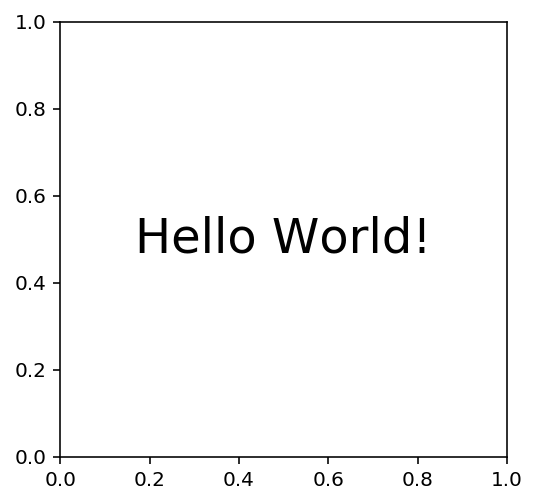

In [6]:
def test_figure():
    fig, ax = tfplot.subplots(figsize=(4, 4))
    ax.text(0.5, 0.5, "Hello World!",
            ha='center', va='center', size=24)
    return fig

fig = test_figure()
fig

### `tfplot.figure.to_array()`

This method converts a matplotlib `Figure` object into a `numpy.ndarray`.

In [7]:
im_fig = tfplot.figure.to_array(fig)
im_fig.shape

(288, 288, 4)

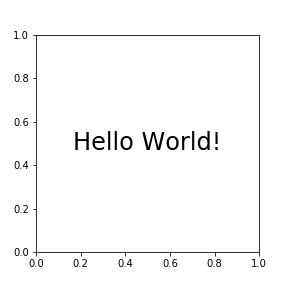

In [8]:
Image.fromarray(im_fig)

### `tfplot.figure.to_summary()`

This method converts a matplotlib `Figure` object into `tf.Summary` protobuf object, containing a single image summary. 

In [9]:
summary = tfplot.figure.to_summary(fig, "figure/image/0")

print(type(summary))
print("tag :", summary.value[0].tag)
print("height :", summary.value[0].image.height)
print("width :", summary.value[0].image.width)
print("len(PNG) :", len(summary.value[0].image.encoded_image_string))

<class 'tensorflow.core.framework.summary_pb2.Summary'>
tag : figure/image/0
height : 288
width : 288
len(PNG) : 6065


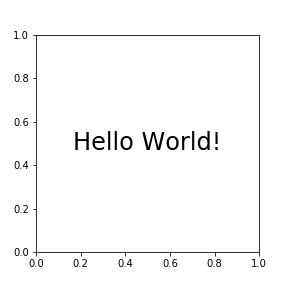

In [10]:
extract_image_summary(summary)